#### Test correct_biolume_proxies() 

This Notebook is part of the auv-python project (https://github.com/mbari-org/auv-python).

To use this first process a mission using the `--no_cleanup` option so that upstream data files are available locally for fast execution of resample.py, e.g.:

```
src/data/process_dorado.py --mission 2023.192.01 -v --no_cleanup --noinput
```


In [1]:
# Add src/data to Python path - relative to this script's location
import sys
from pathlib import Path

src_data_path = Path.cwd().parent / "src" / "data"
sys.path.insert(0, str(src_data_path))

In [2]:
# Set file paths for the align and netcdf files – assumes mission was processed as shown in the first cell
from logs2netcdfs import BASE_PATH, MISSIONNETCDFS

auv_name = "dorado"
mission = "2023.192.01"

align_file = BASE_PATH / auv_name / MISSIONNETCDFS / mission / f"{auv_name}_{mission}_align.nc"
nc_file = BASE_PATH / auv_name / MISSIONNETCDFS / mission / f"{auv_name}_{mission}_1S.nc"


In [3]:
# Execute resample for the mission.  Will iterate on this step along with checking the results below.
# Note: It can be useful to execute this same command in the VS Code debugger. See TROUBLESHOOTING.md.
align_file = BASE_PATH / auv_name / MISSIONNETCDFS / mission / f"{auv_name}_{mission}_align.nc"
align_file4 = BASE_PATH / auv_name / MISSIONNETCDFS / mission / f"{auv_name}_{mission}_align.nc4"
if not align_file.exists():
    align_file = align_file4
nc_file = BASE_PATH / auv_name / MISSIONNETCDFS / mission / f"{auv_name}_{mission}_1S.nc"
!../src/data/resample.py --auv_name dorado --mission 2023.192.01 -v

INFO 2026-01-08 14:39:04,403 resample.py resample_align_file():2050 [42068] Using depth_threshold = 10.00 m
INFO 2026-01-08 14:39:05,077 resample.py get_mission_start_end():1995 [42068] Determining mission start and end times
INFO 2026-01-08 14:39:05,077 resample.py instruments_variables():363 [42068] Reading variables from /Users/mccann/GitHub/auv-python/data/auv_data/dorado/missionnetcdfs/2023.192.01/dorado_2023.192.01_align.nc4 mission netCDF file
INFO 2026-01-08 14:39:05,094 resample.py get_mission_start_end():2010 [42068] navigation: 2023-07-11T20:06:47.210657024 to 2023-07-12T16:35:07.871815936 (0 days 00:00:04.211350528 before mission_end)
INFO 2026-01-08 14:39:05,097 resample.py get_mission_start_end():2010 [42068] hs2       : 2023-07-11T20:06:01.893761536 to 2023-07-12T16:35:07.821819392 (0 days 00:00:04.261347072 before mission_end)
INFO 2026-01-08 14:39:05,101 resample.py get_mission_start_end():2010 [42068] ctd1      : 2023-07-11T20:06:19.732539392 to 2023-07-12T16:35:07.80

In [4]:
# Open the resampled mission file and check the results
import xarray as xr
ds = xr.open_dataset(nc_file, decode_times=False)

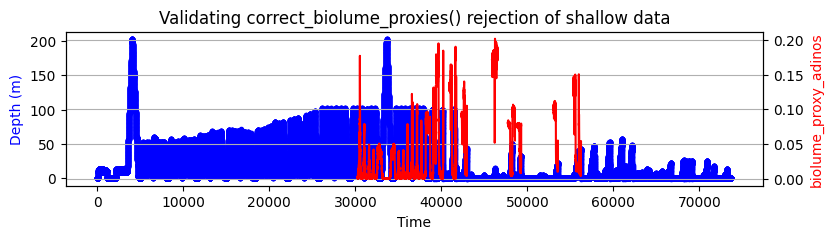

In [5]:
import pylab as plt
fig, ax1 = plt.subplots(figsize=(9, 2))
ax1.plot(ds['time'], ds['depth'], 'b.')
ax1.set_xlabel('Time')
ax1.set_ylabel('Depth (m)', color='b')
ax2 = ax1.twinx()
ax2.plot(ds['time'], ds['biolume_proxy_adinos'], 'r-')
ax2.set_ylabel('biolume_proxy_adinos', color='r')
title = "Validating correct_biolume_proxies() rejection of shallow data"
plt.title(title)
plt.grid()